In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [55]:
def imgFilt(img):

    filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    grimg = cv2.cvtColor(filtered_img,cv2.COLOR_RGB2GRAY)
        
    lightMask = np.asarray(grimg)
    Mask_indices = lightMask > 125
    filtered_img[Mask_indices] = 255
    return filtered_img

In [56]:
def color_detection(frame_in):
    # Take each frame
    #frame = cv2.imread(image_name)
        
        src_height, src_width, src_channels = frame_in.shape
        roiX = int(src_width / 4)
        roiWidth = roiX * 2
        roiY = src_height / 4
        roiHeight = roiY * 2
        frame = frame_in[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
        filtered_img = imgFilt(frame_in)
        filtered_img = filtered_img[roiY : roiY+roiHeight, roiX : roiX+roiWidth]
        
        src_height, src_width, src_channels = frame.shape
        max_value = src_height * src_width * 255
      

        
        
        # Convert BGR to HSV
        #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        hsv= cv2.cvtColor(filtered_img, cv2.COLOR_BGR2HSV)
        # detect red
        lower = np.array([150, 30, 30])
        upper = np.array([190, 255, 255])
        mask1 = cv2.inRange(hsv, lower, upper)
        lower = np.array([0, 30, 30])
        upper = np.array([10, 255, 255])
        mask2 = cv2.inRange(hsv, lower, upper)
        mask = mask1 + mask2
        redVal = float(mask.sum()) / float(max_value)
        if redVal > 0.2:
            red="true"
        else:
            red="false"

        # detect yellow
        lower = np.array([5, 100, 100])
        upper = np.array([40, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        yellowVal = float(mask.sum()) / float(max_value)
        if yellowVal > 0.15:
            yellow="true"
        else:
            yellow="false"

        # detect blue
        lower = np.array([100, 60, 60])
        upper = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        blueVal = float(mask.sum()) / float(max_value)
        if blueVal > 0.35:
            blue="true"
        else:
            blue="false"

        # detect green (gray)
        lower_green = np.array([103, 86, 65])
        upper_green = np.array([145, 133, 128])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        greenVal = float(mask.sum()) / float(max_value)
        if greenVal > 0.01:
            green="true"
        else:
            green="false"

        #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # detect white
        lower = np.array([0, 0, 140])
        upper = np.array([256, 60, 256])
        mask = cv2.inRange(hsv, lower, upper)
        whiteVal = float(mask.sum()) / float(max_value)
        if whiteVal > 0.5:
            white="true"
        else:
            white="false"

        # detect black
        lower_black = np.array([110,50,50])
        upper_black= np.array([130,255,255])
        mask = cv2.inRange(hsv, lower_black, upper_black)
        blackVal = float(mask.sum()) / float(max_value)
        if blackVal > 0.01:
            black="true"
        else:
            black="false"

        return red, yellow, blue, green, white, black

In [68]:
img = cv2.imread('./redlight.jpg')
img = img[325:450,1040:width]
average_color = [img[:, :, i].mean() for i in range(img.shape[-1])]
print average_color

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img)

img[:,:,0]=img[:,:,0]-(average_color[0]-180)
img[:,:,1]=img[:,:,1]-(average_color[1]-150)
img[:,:,2]=img[:,:,2]-(average_color[2]-130)

plt.subplot(122),plt.imshow(img)


[93.066599999999994, 103.04336666666667, 127.63213333333333]


(<matplotlib.axes._subplots.AxesSubplot at 0x804e400>,
 <matplotlib.image.AxesImage at 0x8218208>)

('true', 'false', 'false', 'false', 'false', 'false')


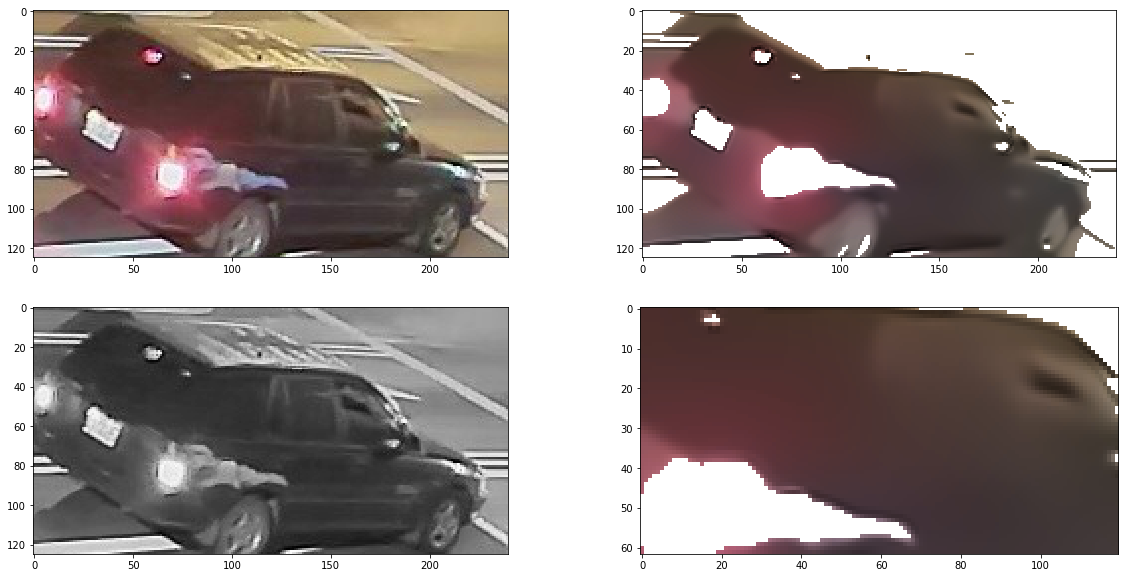

In [61]:
img = cv2.imread('./redlight.jpg')
height,width,chann = img.shape
#img = img[250:370,100:400]#red1
#img = img[270:320,310:350]#red2
img = img[325:450,1040:width]

#img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 


print color_detection(img)


#print color_detection(filtered_img)
grimg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2.imshow("grimg",grimg)
cv2.waitKey(0)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
filtered_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
filtered_img = imgFilt(filtered_img)



#dst = cv2.imread('./red2.jpg')
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(img)
plt.subplot(222),plt.imshow(filtered_img)
plt.subplot(223),plt.imshow(grimg ,cmap='gray')
src_height, src_width, src_channels = img.shape
roiX = int(src_width / 4)
roiWidth = roiX * 2
roiY = src_height / 4
roiHeight = roiY * 2
img = filtered_img[roiY:roiY+roiHeight, roiX:roiX+roiWidth]
plt.subplot(224),plt.imshow(img)
plt.show()
